# **Pima Indain Diabetes**

 **Problem Statement:**

To predict the onset of diabetes in female patients of Pima Indian heritage based on diagnostic measurements such as number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age.

The goal is to build a model that can accurately classify whether a Pima Indian woman has diabetes or not based on her medical information. This can be used to identify individuals at high risk of developing diabetes and potentially intervene early to prevent or manage the disease.

**Data Dictionary:**

preg: Number of times pregnant.

plas: Plasma glucose concentration a 2 hours in an oral glucose
tolerance test.

pres: Diastolic blood pressure (mm Hg).

skin: Triceps skin fold thickness (mm).

test: 2-Hour serum insulin (mu U/ml).

mass: Body mass index (weight in kg/(height in m)^2).

pedi: Diabetes pedigree function.

age: Age (years).

class: Class variable (0 or 1) indicating whether the patient has diabetes or not (1: diabetic, 0: not diabetic).

**Importing Libraries**

In [40]:
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Uploading Dataset**

In [41]:
#from google.colab import drive
#drive.mount('/content/drive')

In [42]:

#Load the file
#pima_df = pd.read_csv("/content/drive/MyDrive/dataset/pima-indians-diabetes.csv")


**Display 5 Records**

In [43]:
pima_df = pd.read_csv("D:\Downloads\pima-indians-diabetes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\3651185598.py:1: SyntaxWarning: invalid escape sequence '\D'
  pima_df = pd.read_csv("D:\Downloads\pima-indians-diabetes.csv")


In [44]:
pima_df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display Number of Rows & Columns**

In [45]:
pima_df.shape

(768, 9)

**Display all Datatypes**

In [46]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**5 Points Summary Data**

In [47]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**To Check Null Values**

In [48]:
pima_df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [49]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array,
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\482248674.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pima_df[~pima_df.applymap(np.isreal).all(1)]


,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [50]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
#pima_df = pima_df.fillna(pima_df.median())
#pima_df

**Univariate Analysis**

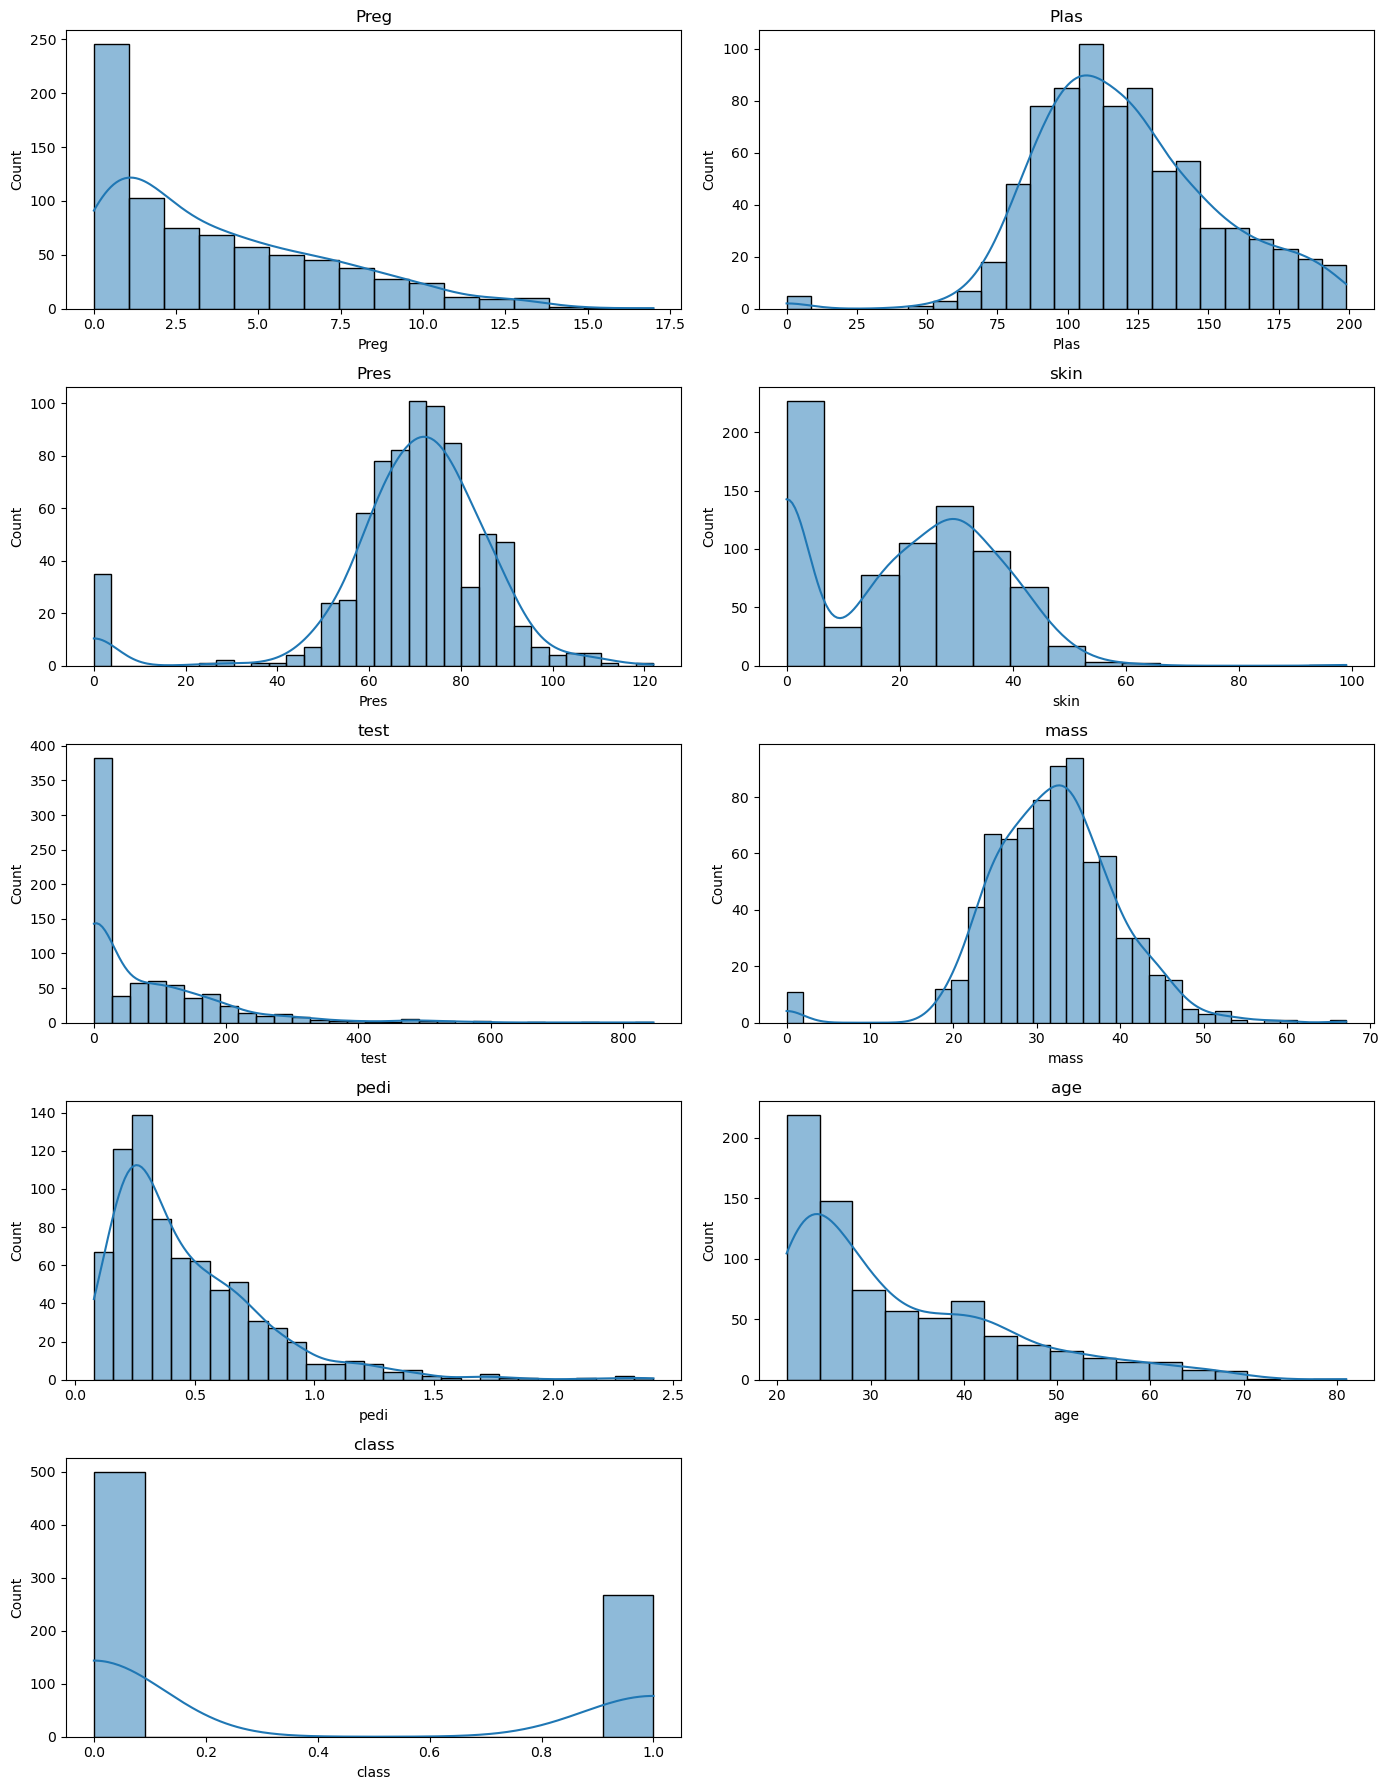

In [51]:


cols = pima_df.select_dtypes(include='number').columns

plt.figure(figsize=(14, 2* len(cols)))

for i, col in enumerate(cols):
    plt.subplot((len(cols) + 1) // 2, 2, i + 1)
    sns.histplot(pima_df[col], kde=True)
    
    plt.title(col)

plt.tight_layout()
plt.show()


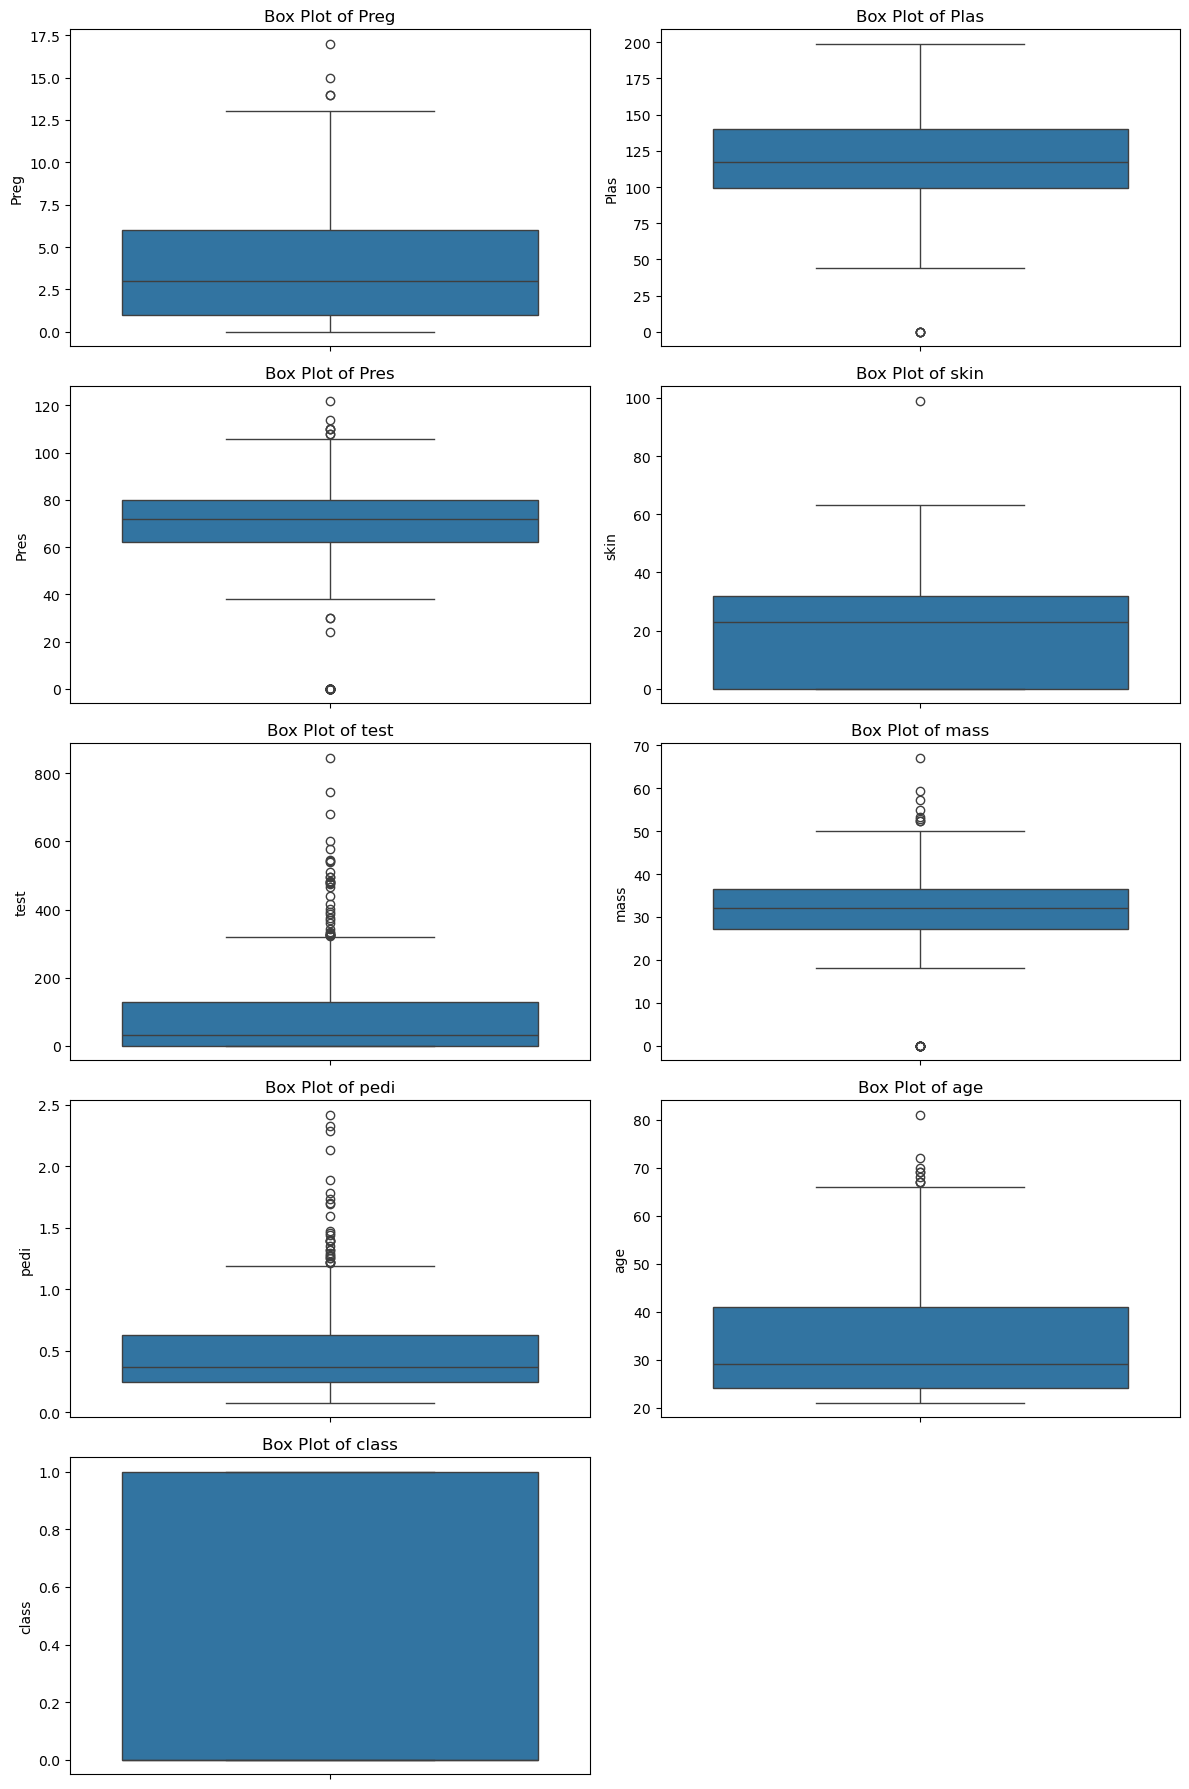

In [52]:

cols = pima_df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 2 * len(cols)))

for i, col in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y=pima_df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [53]:
#Box Plots: (Identify potential outliers and distribution skewness)
#for col in pima_df.columns:
#    if pima_df[col].dtype != 'object':
#        plt.figure()
#        sns.boxplot(y=pima_df[col])
#        plt.title(f'Box Plot of {col}')
#        plt.show()

In [54]:
#Frequency Tables (for categorical variables)
# Example for the 'class' variable (assuming it's categorical):
pima_df['class'].value_counts()


class
0    500
1    268
Name: count, dtype: int64

In [55]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will
# be better than predicting class 1.

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


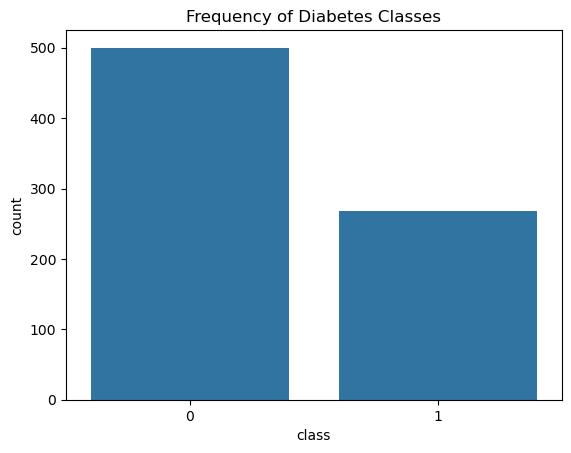

In [56]:
#Bar Charts (for categorical variables):
plt.figure()
sns.countplot(x='class', data=pima_df)
plt.title('Frequency of Diabetes Classes')
plt.show()


**Bivariate Analysis**

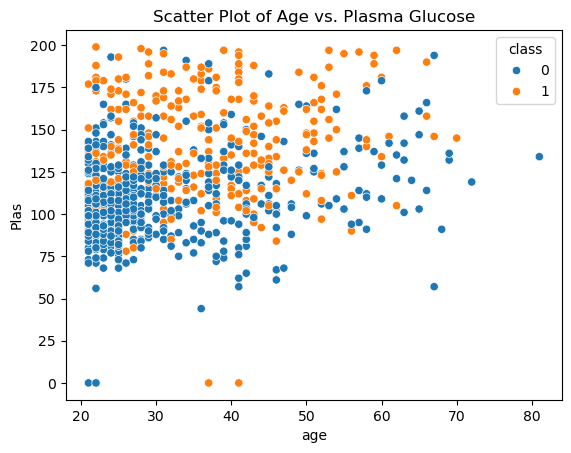

In [57]:
#Scatter Plots: Visualize the relationship between two numerical variables.
sns.scatterplot(x='age', y='Plas', data=pima_df, hue='class')
plt.title('Scatter Plot of Age vs. Plasma Glucose')
plt.show()


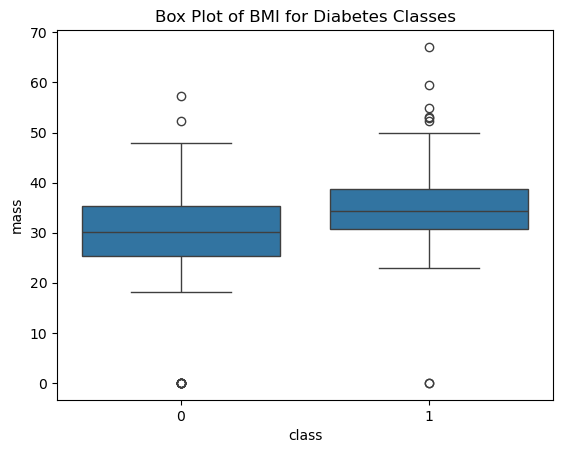

In [58]:
#Box Plots (for categorical vs. numerical)
sns.boxplot(x='class', y='mass', data=pima_df)
plt.title('Box Plot of BMI for Diabetes Classes')
plt.show()


In [59]:
#Cross-tabulation (for categorical vs. categorical):frequency of diabetes classes for different numbers of pregnancies.
pd.crosstab(pima_df['Preg'], pima_df['class'])


class,0,1
Preg,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


**Multivariate Analysis**

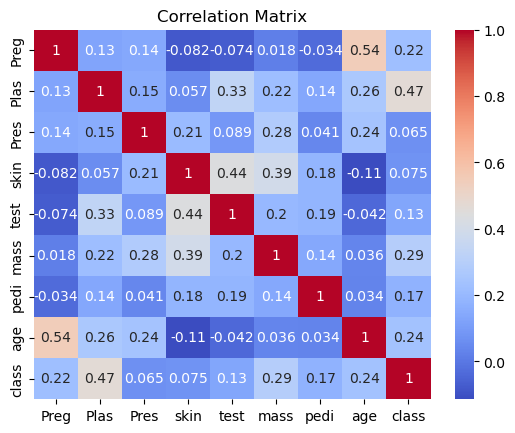

In [60]:
#Heatmap (Correlation Matrix):
correlation_matrix = pima_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


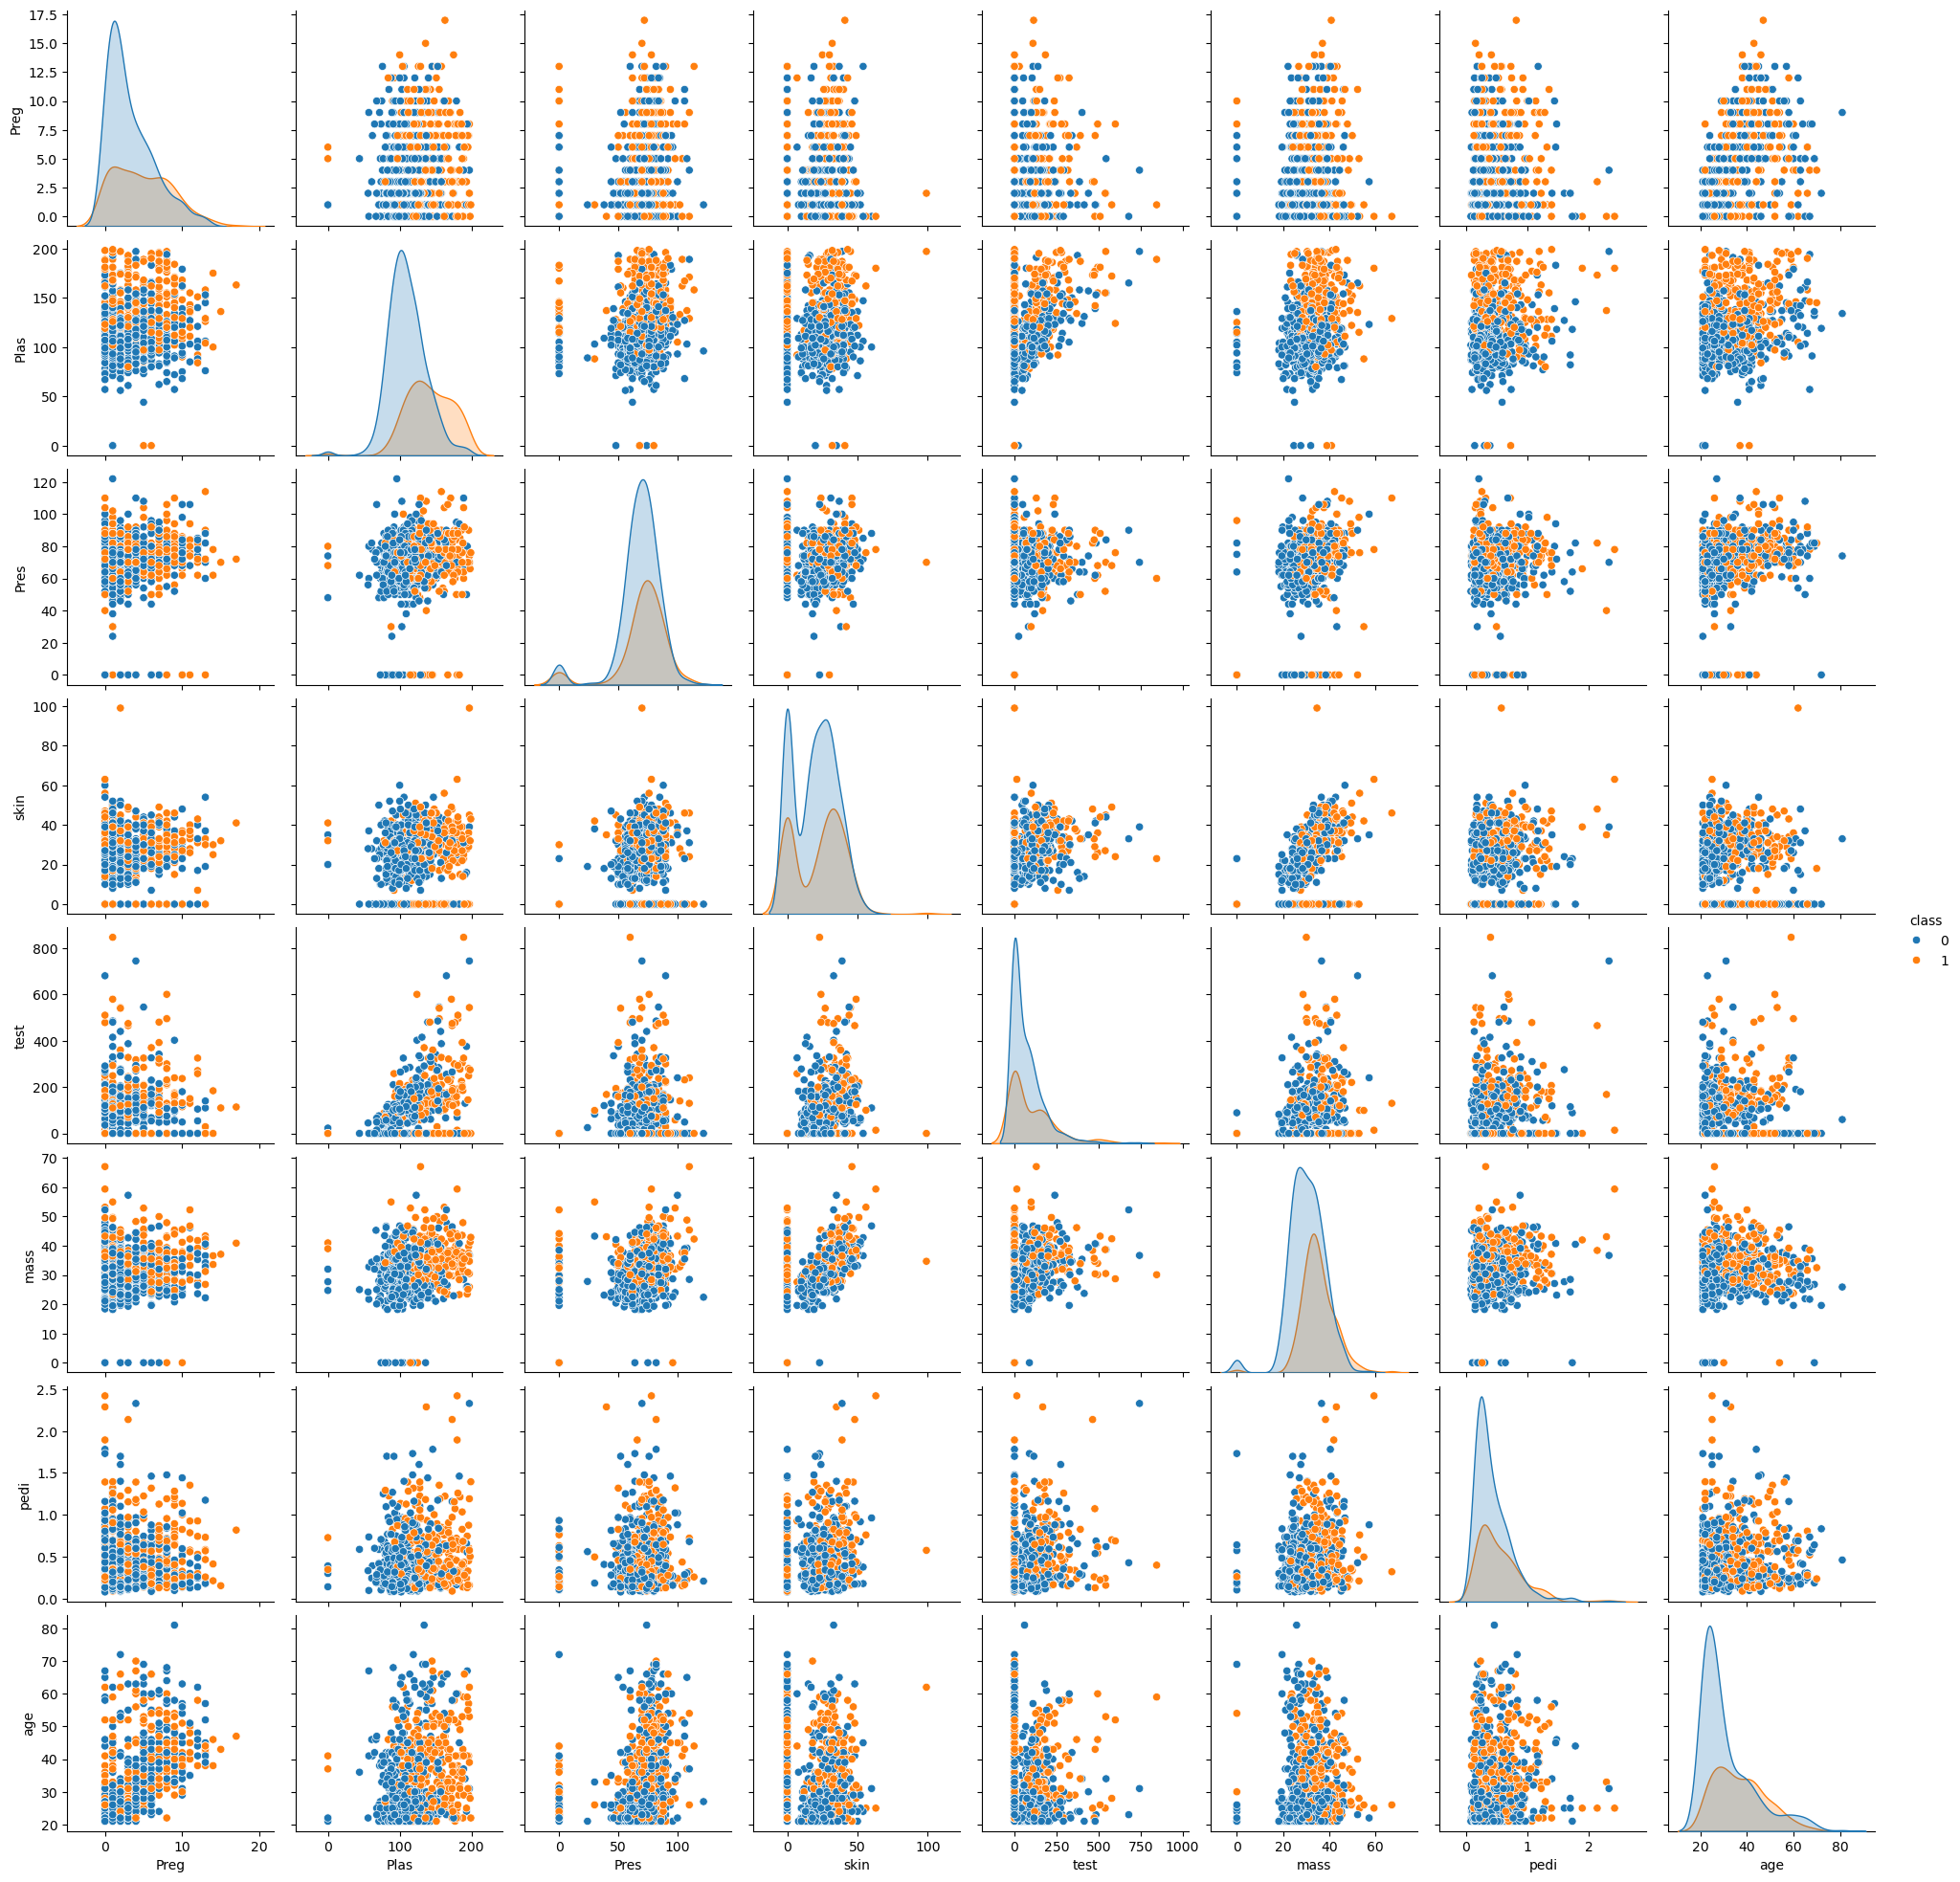

In [61]:
#Pair Plot: Creates scatter plots for all pairs of numerical variables in the dataset, along with histograms for individual variables.
sns.pairplot(pima_df, hue='class')  # 'class' is used for color-coding
plt.show()

In [62]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view

#pima_df_attr = pima_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.tight_layout()


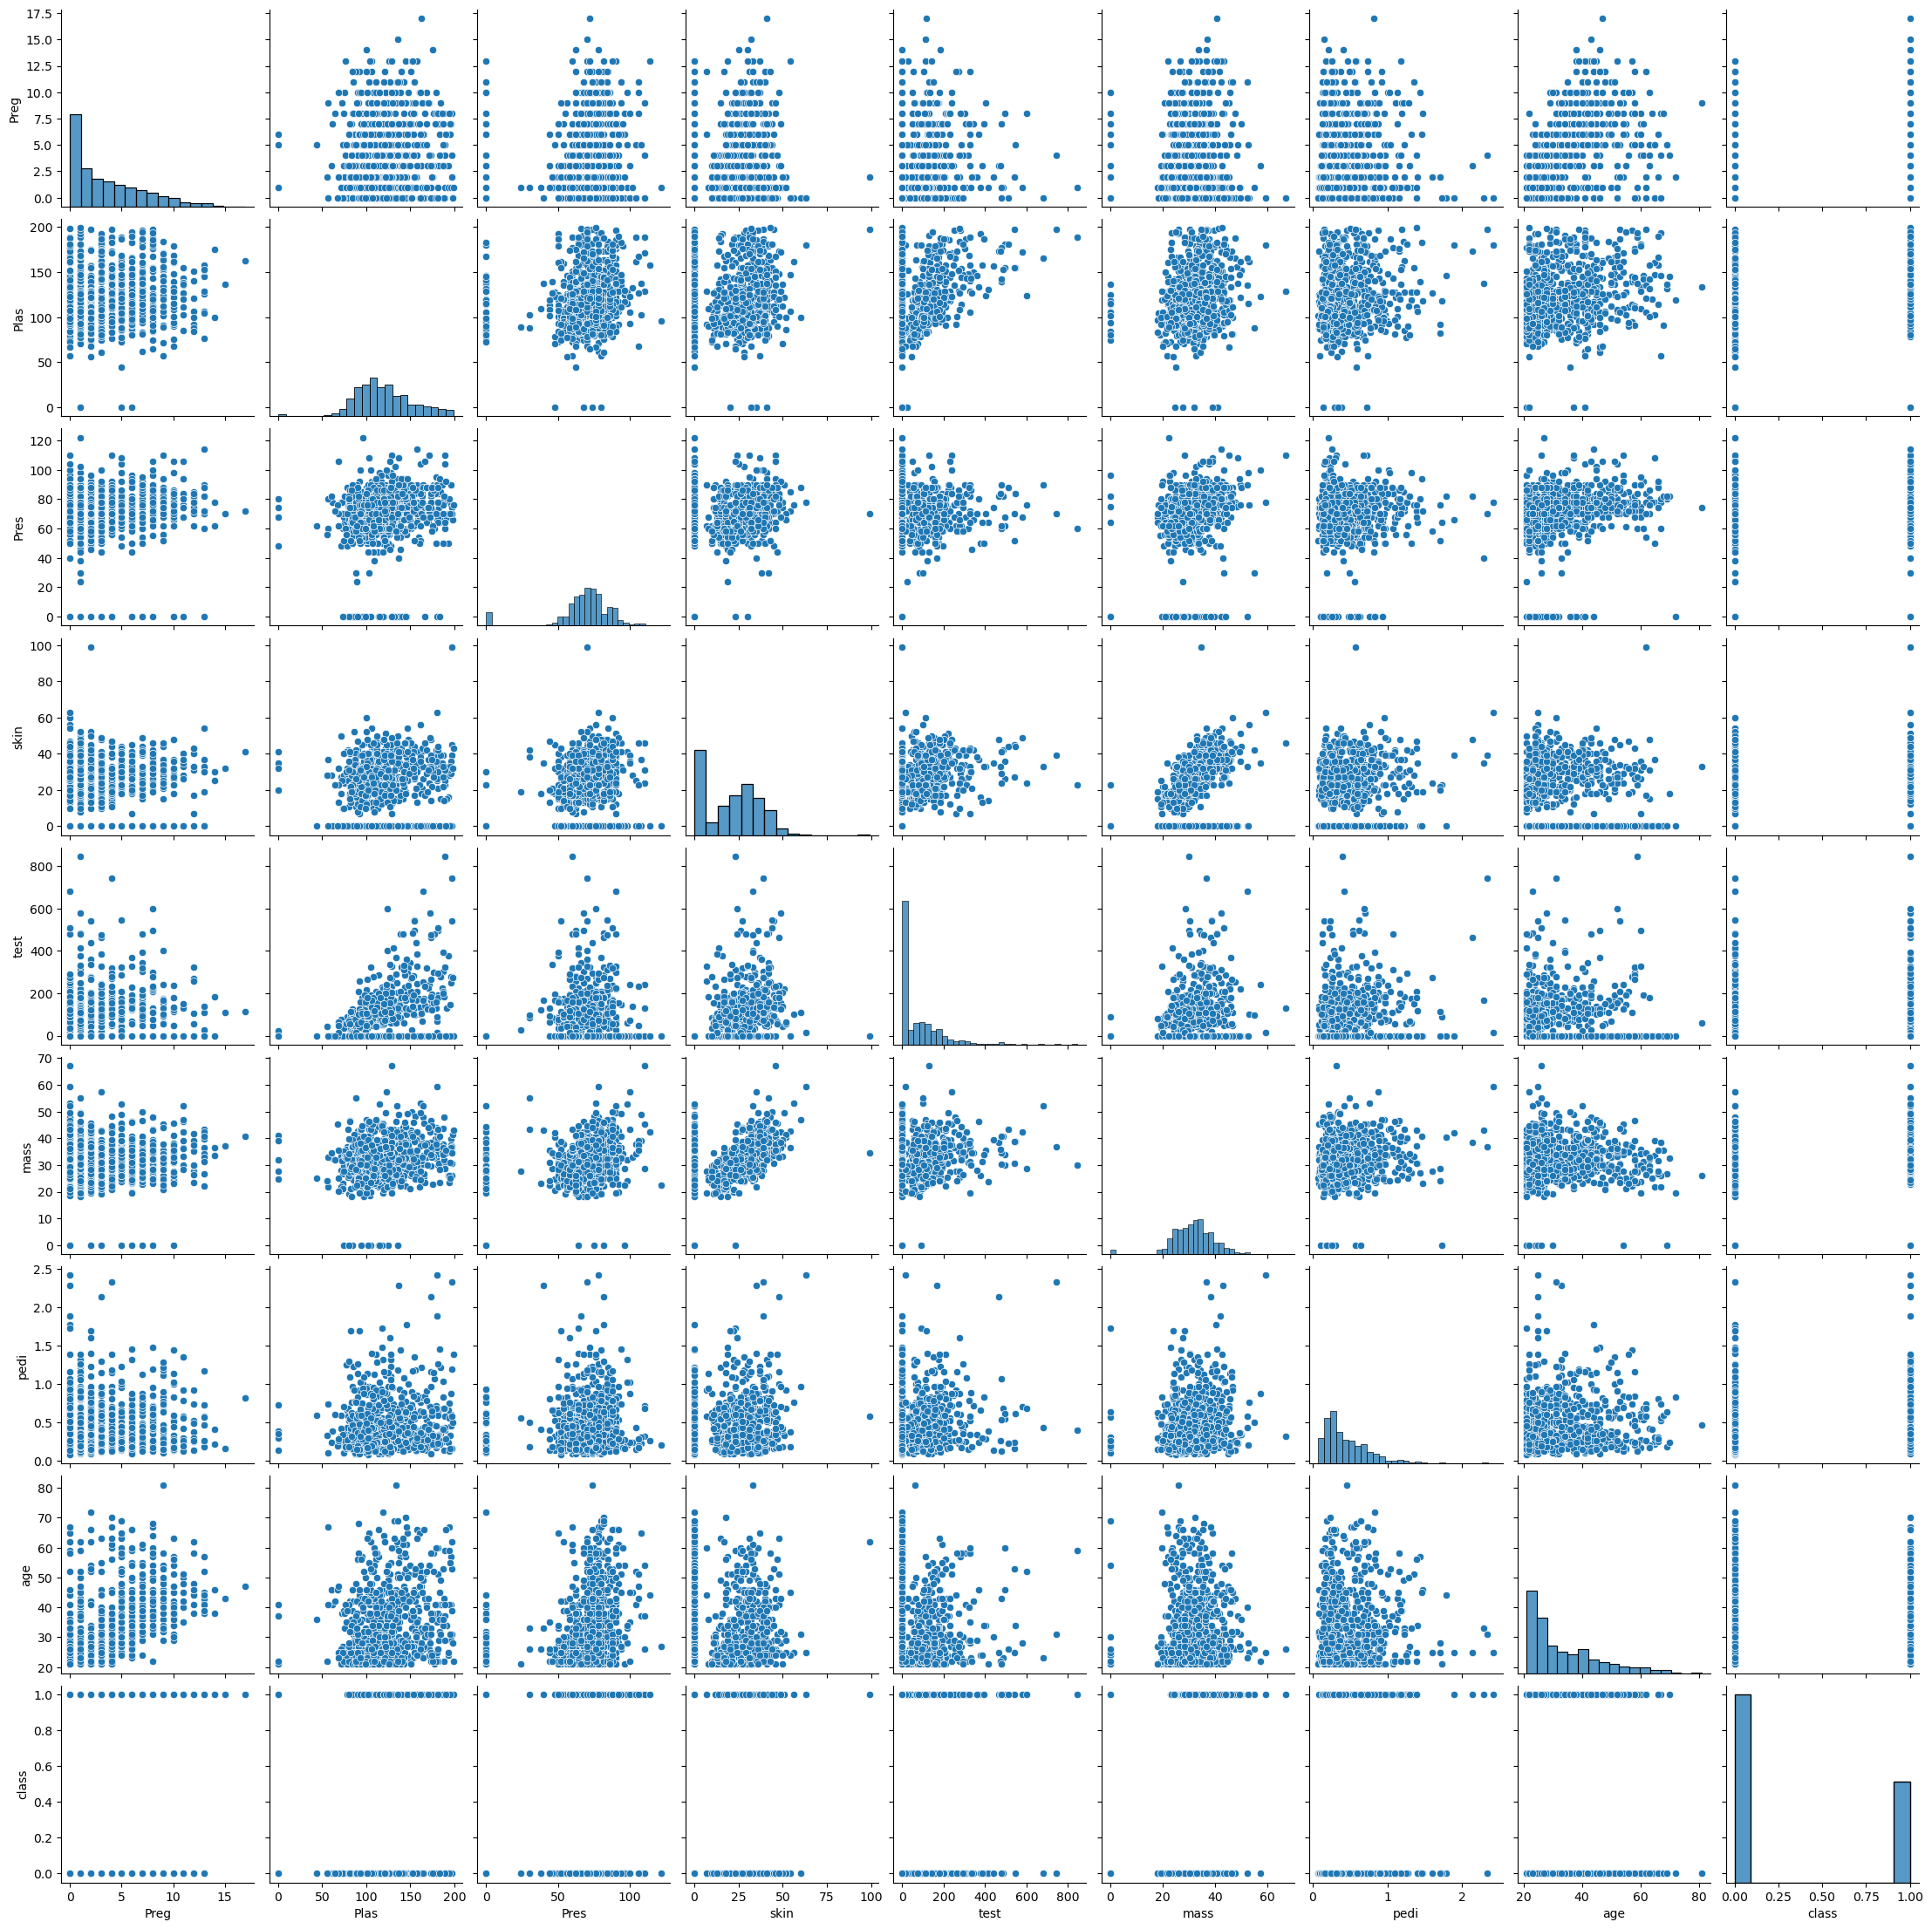

In [63]:
# Pairplot using sns

sns.pairplot(pima_df)

In [64]:
#Observations:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [65]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


**Model Building**

In [66]:
array = pima_df.values
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [67]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Get the feature names from X_train
t = X_train.columns



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:

coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

       Preg      Plas     Pres      skin      test      mass      pedi  \
0  0.101071  0.033528 -0.01571 -0.001363 -0.000691  0.089417  0.557469   

        age  intercept  
0  0.017134  -7.860301  


In [69]:


model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))



0.7835497835497836
[[132  14]
 [ 36  49]]


In [70]:
# To scale the dimensions we need scale function which is part of scikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [71]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[132  14]
 [ 37  48]]


Confusion Matrix


<Axes: >

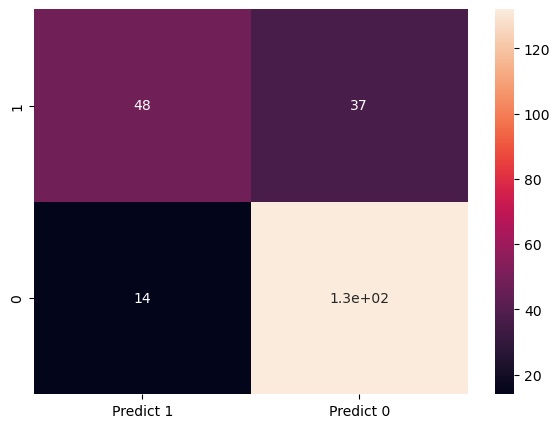

In [72]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

NaiveBayes

 Naive Bayes to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

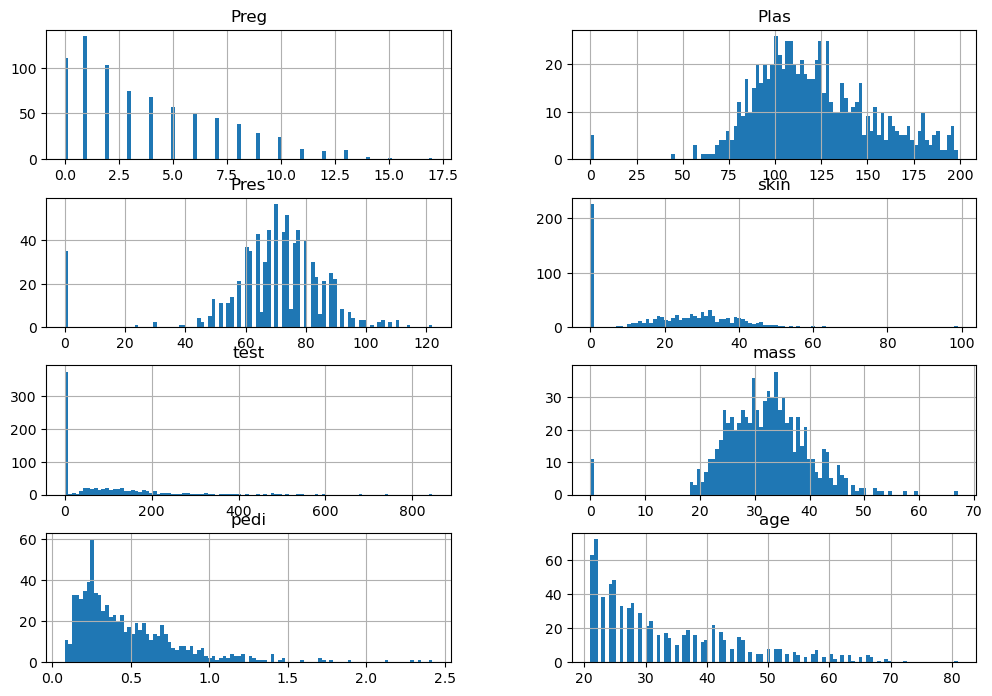

In [73]:
columns = list(pima_df)[0:-1] # Excluding Outcome column which has only
pima_df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

In [74]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [75]:
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\3505115133.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model.fit(X_train, y_train.ravel())


GaussianNB()

In [77]:
diab_train_predict = diab_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.7616



In [78]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.7835



Confusion Matrix


<Axes: >

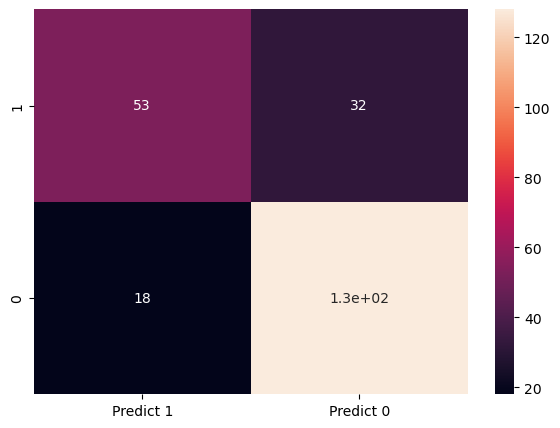

In [79]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [80]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.62      0.68        85
           0       0.80      0.88      0.84       146

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



K-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred_knn = knn_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Accuracy Score: 0.7705627705627706


In [86]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Confusion Matrix:
 [[128  18]
 [ 35  50]]


Confusion Matrix


<Axes: >

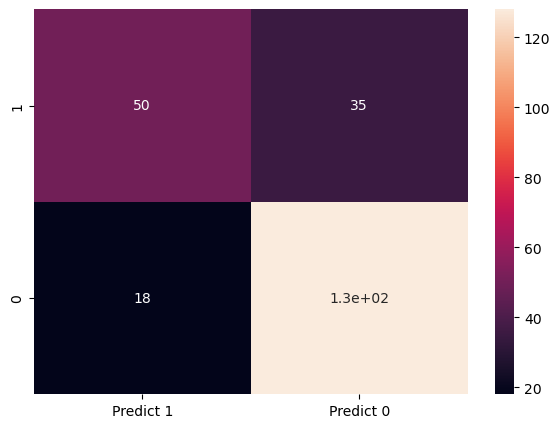

In [91]:
print("Confusion Matrix")
cm_knn=metrics.confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True)

In [94]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

